# Python Script

### Assignment 4.2: Scatterplots, Bubble Charts, DensityMaps/Plots

#### DSC640
Taniya Adhikari

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numerize import numerize 
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [2]:
birthrates = pd.read_csv('birth-rate.csv')
birthrates.head(3)

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875


In [3]:
gdp_per_capita = pd.read_csv('GDP.csv')
gdp_per_capita.head(3)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.01392,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020,30253.279360,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1770.73623,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,591.19003,638.845852,624.315454,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871


In [4]:
metadata= pd.read_csv('metadata_country.csv')
metadata = metadata[['Country Code', 'Region']]
metadata.head(3)


,Country Code,Region
0,ABW,Latin America & Caribbean
1,AFE,NaN
2,AFG,South Asia


In [5]:
life_expectancy = pd.read_csv('life-expectancy.csv')
life_expectancy.head(3)

,country,year,expectancy
0,Afghanistan,2008,42
1,Albania,2008,73
2,Algeria,2008,71


In [6]:
life_expectancy.shape

(187, 3)

In [7]:
life_expectancy['year'].describe()

count     187.0
mean     2008.0
std         0.0
min      2008.0
25%      2008.0
50%      2008.0
75%      2008.0
max      2008.0
Name: year, dtype: float64

In [8]:
country = life_expectancy['country'].to_list()

In [9]:
bd =  birthrates[birthrates['Country'].isin(country)]
gdp = gdp_per_capita[gdp_per_capita['Country Name'].isin(country)]

In [10]:
gdp = gdp[['Country Name','Country Code', '2008']]
gdp.shape

(161, 3)

In [11]:
gdp = pd.merge(gdp, metadata, how="inner", on=["Country Code"])
print(gdp.shape)
gdp.head(4)

(161, 4)


,Country Name,Country Code,2008,Region
0,Afghanistan,AFG,364.663542,South Asia
1,Angola,AGO,4080.941034,Sub-Saharan Africa
2,Albania,ALB,4370.539925,Europe & Central Asia
3,United Arab Emirates,ARE,44498.940510,Middle East & North Africa


In [12]:
bd = bd[['Country', '2008']]
bd.shape

(161, 2)

In [13]:
bd.rename(columns={'2008': 'birthrates', 'Country':'country'}, inplace=True)
gdp.rename(columns={'2008': 'gdp', 'Country Name':'country'}, inplace=True)

In [14]:
demographics = pd.merge(life_expectancy, bd, how="inner", on=["country"])
demographics.shape

(161, 4)

In [15]:
demographics = pd.merge(demographics,gdp, how="inner", on=["country"])

In [16]:
demographics[demographics['birthrates'].isnull()]

,country,year,expectancy,birthrates,Country Code,gdp,Region
4,Antigua and Barbuda,2008,74,NaN,ATG,16044.105800,Latin America & Caribbean
41,Dominica,2008,74,NaN,DMA,6468.944767,Latin America & Caribbean
77,Kiribati,2008,67,NaN,KIR,1428.134977,East Asia & Pacific
91,Marshall Islands,2008,59,NaN,MHL,2704.463554,East Asia & Pacific
95,Monaco,2008,82,NaN,MCO,185785.725900,Europe & Central Asia
111,Palau,2008,72,NaN,PLW,10598.882830,East Asia & Pacific


In [17]:
demographics[demographics['gdp'].isnull()]

,country,year,expectancy,birthrates,Country Code,gdp,Region
133,Somalia,2008,48,44.105,SOM,NaN,Sub-Saharan Africa


In [18]:
demographics.dropna(inplace=True)
demographics.shape

(152, 7)

### Python Scatter Plot

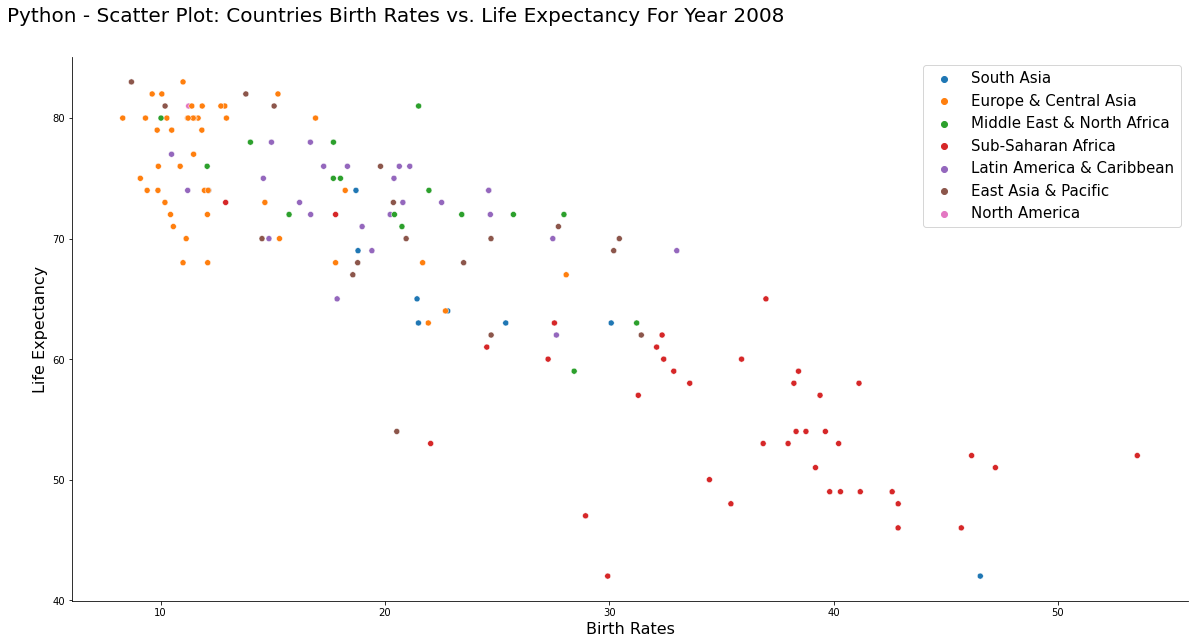

In [73]:
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots()

sns.scatterplot(x="birthrates", y="expectancy",hue="Region", data=demographics)


plt.suptitle("Python - Scatter Plot: Countries Birth Rates vs. Life Expectancy For Year 2008", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

plt.ylabel('Life Expectancy', size=16)
plt.xlabel('Birth Rates', size=16)
plt.legend(fontsize=15)

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

plt.show()

### Python - Bubble Chart

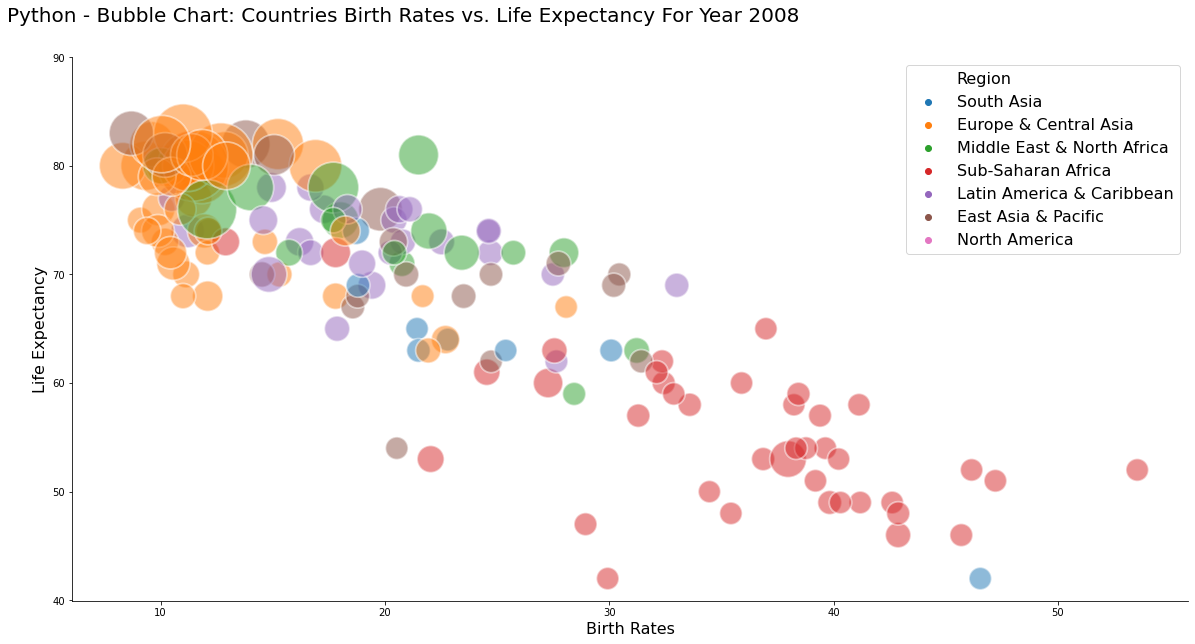

In [61]:
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots()

g = sns.scatterplot(x="birthrates", y="expectancy",
                    size="gdp", sizes=(500,5000), 
                    alpha=0.5, hue="Region", data=demographics)

h,l = g.get_legend_handles_labels()
plt.legend(h[0:8],l[0:8], fontsize=16)

plt.suptitle("Python - Bubble Chart: Countries Birth Rates vs. Life Expectancy For Year 2008", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

plt.ylim(top=90)
plt.ylabel('Life Expectancy', size=16)
plt.xlabel('Birth Rates', size=16)

sns.despine()
plt.show(g)


### Python - Density Plot

C:\Users\bibek\anaconda3\envs\my_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


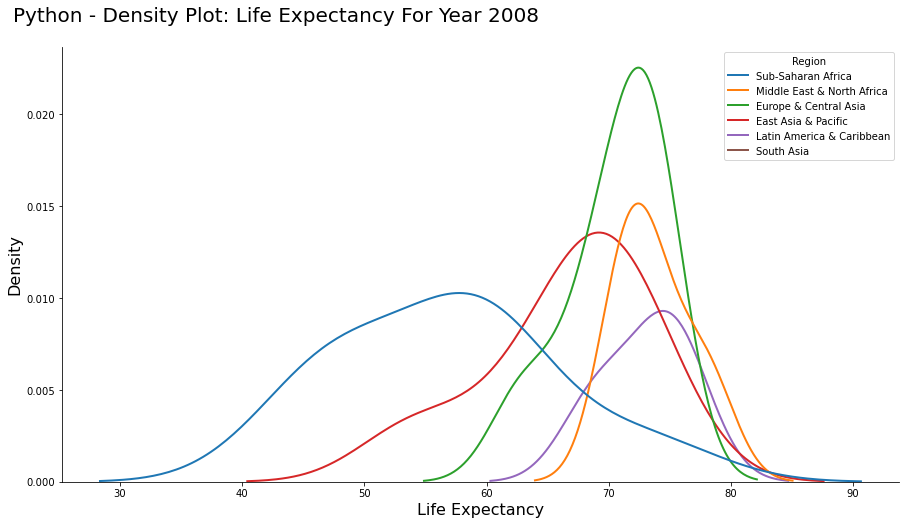

In [68]:
plt.rcParams['figure.figsize'] = [15,8]
sns.kdeplot(x = sample['expectancy'],
            hue = sample['Region'], 
            linewidth = 2)
plt.suptitle("Python - Density Plot: Life Expectancy For Year 2008", 
             size=20, x=0.08, y=.95,horizontalalignment='left', verticalalignment='top')

plt.xlabel('Life Expectancy', size=16)
plt.ylabel("Density", size=16)

sns.despine()

plt.show()

In [69]:
demographics.to_csv('sample.csv') 